In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# I) Reading data

In [2]:
data = pd.read_csv('../Train.csv')
data.drop(['ADM4_PCODE'], axis=1, inplace=True)
data.head(3)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,-29.142276,25.094093,0.000000


In [3]:
var_desc = pd.read_csv('../variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


# II) Nulls, missing data, data to omit, initial visualizations

In [4]:
# Check for NaNs (none found)
sum(data.isnull().sum())

0

In [5]:
# all numeric (mostly % from 0-1)
data.dtypes

ward                  object
total_households     float64
total_individuals    float64
target               float64
dw_00                float64
                      ...   
pw_07                  int64
pw_08                  int64
lat                  float64
lon                  float64
NL                   float64
Length: 62, dtype: object

In [6]:
# removed weird row with 3867 people in 1 household and mostly 0s including for target
data.loc[data.ward=="93601011: Ward 11"]

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
1815,93601011: Ward 11,1.0,3867.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0,-24.852036,27.349494,11.015128


In [7]:
data.drop(index = [1815], inplace=True)

count    2821.000000
mean       24.516242
std        10.285861
min         1.671886
25%        16.758903
50%        24.157369
75%        32.227600
max        55.528423
Name: target, dtype: float64

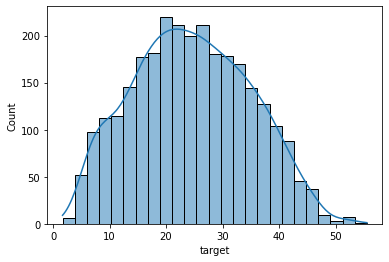

In [8]:
# Looking at distribution of the label. Seems pretty normal + symmetrical (might be suitable for stats tests)
sns.histplot(x=data.target,kde=True)
data.target.describe()

# III) Correlations with the label

lan_08    0.004782
dw_00     0.015699
lan_02    0.020461
lan_06    0.039018
lan_07    0.047436
lan_09    0.066122
psa_02    0.098271
lan_10    0.106493
pw_01     0.112622
dw_11     0.115401
Name: target, dtype: float64


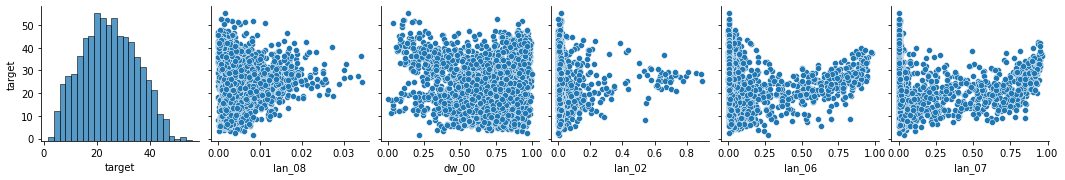

In [9]:
# predictors with weak correlations (depends on the problem, but <0.2 is usually considered very weak)
print(abs(data.corr()['target']).sort_values(ascending=True).head(10))
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','lan_08','dw_00','lan_02','lan_06','lan_07'])

target    1.000000
psa_00    0.782119
pw_00     0.756481
psa_01    0.718300
car_01    0.704840
car_00    0.704840
stv_00    0.666148
stv_01    0.666148
lln_00    0.639169
lln_01    0.639169
Name: target, dtype: float64


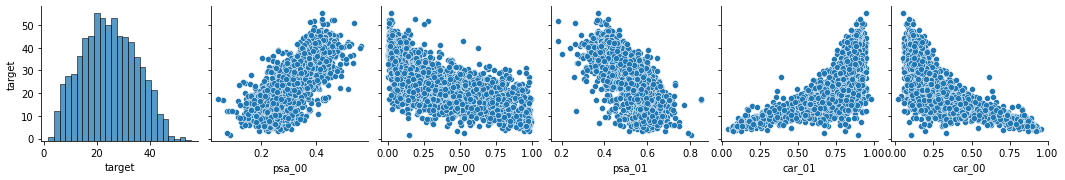

In [10]:
# predictors with strong correlations (>0.7 is generally very strong, but >0.5 is not bad for most real life data)
print(abs(data.corr()['target']).sort_values(ascending=False).head(10))
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','psa_00','pw_00','psa_01','car_01','car_00'])

# IV) Univariate + intra-group analysis
## As the dataset comprises of groups of predictors that convey a demographical aspect of a given ward in SA, we decided that it would be reasonable to break our analyses by group (each group would combine to provide a complementary set of information)

In [11]:
# Double check: are predictors within each category true complements of one another?
dwelling = ['dw_00','dw_01','dw_02','dw_03','dw_04','dw_05','dw_06','dw_07','dw_08','dw_09','dw_10','dw_11','dw_12','dw_13']
school = ['psa_00','psa_01','psa_02','psa_03','psa_04']
tv = ['stv_00','stv_01']
car = ['car_00','car_01']
landline = ['lln_00','lln_01']
language = ['lan_00','lan_01','lan_02','lan_03','lan_04','lan_05','lan_06','lan_07','lan_08','lan_09','lan_10','lan_11','lan_12','lan_13','lan_14']
race = ['pg_00','pg_01','pg_02','pg_03','pg_04']
water = ['pw_00','pw_01','pw_02','pw_03','pw_04','pw_05','pw_06','pw_07','pw_08']

# Percentages add up to 1, which indicates a high probability of intra-correlation
print(sum(round(data[dwelling].sum(axis=1),3)==1))
print(sum(round(data[school].sum(axis=1),3)==1))
print(sum(round(data[tv].sum(axis=1),3)==1))
print(sum(round(data[car].sum(axis=1),3)==1))
print(sum(round(data[landline].sum(axis=1),3)==1))
print(sum(round(data[language].sum(axis=1),3)==1))
print(sum(round(data[race].sum(axis=1),3)==1))
print(sum(round(data[water].sum(axis=1),3)==1))

2821
2821
2821
2821
2821
2821
2821
2821


## Dwellings (dw)

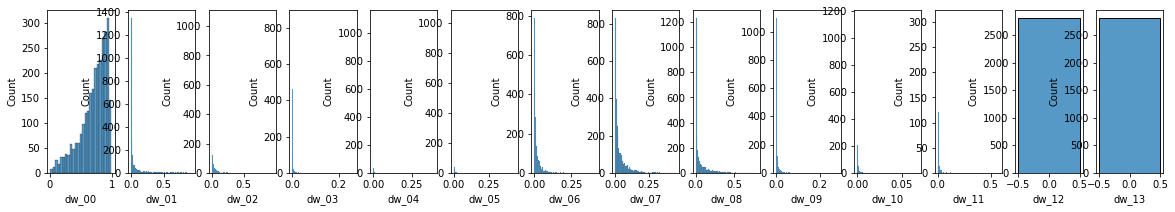

In [12]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(dwelling), figsize=(20, 3))
for i, pred in enumerate(dwelling):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

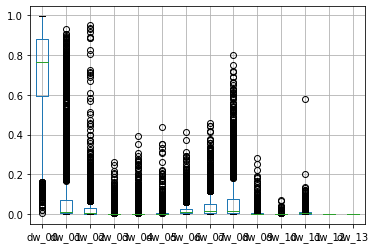

In [13]:
# Many outliers: dw_00-11 if used, should be log-transformed
data[dwelling].boxplot()

[0.01569877697476244, 0.45826026515975354, -0.23330473254272568, -0.3387478318276314, -0.3861654022459816, -0.14672152071814779, -0.24934848115726332, -0.17852995242195155, -0.18732329792871585, -0.23591957592656793, -0.1289814305344898, -0.11540090021222625, nan, nan]


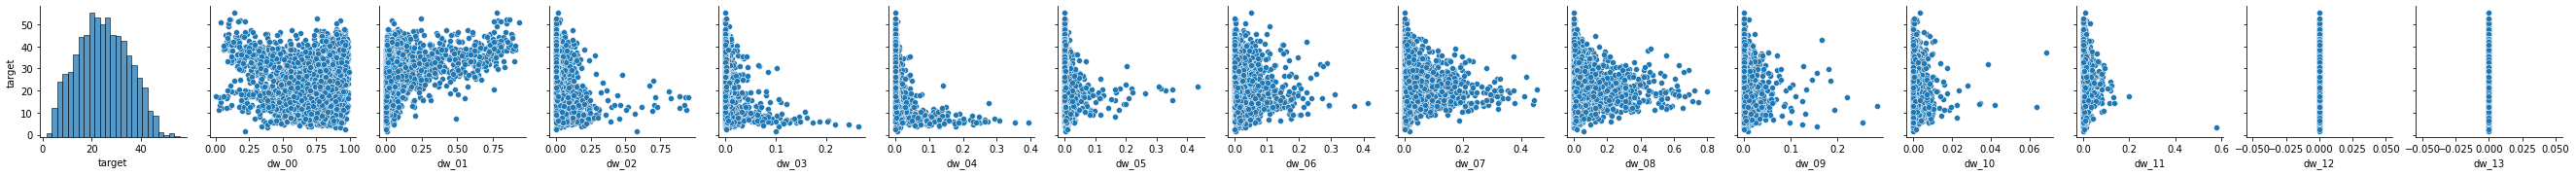

In [14]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+dwelling)
print([data.target.corr(data[pred]) for pred in dwelling])

In [15]:
# dw_11-13 excluded due to containing all 0s
data[dwelling].drop(['dw_12','dw_13'], axis=1).corr()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11
dw_00,1.000000,-0.616539,-0.357519,-0.155633,-0.127005,-0.076634,-0.182343,-0.230076,-0.365565,-0.076874,-0.026297,-0.110501
dw_01,-0.616539,1.000000,0.000545,-0.075173,-0.112307,-0.095827,-0.099550,-0.236397,-0.223610,-0.102576,-0.009296,-0.014772
dw_02,-0.357519,0.000545,1.000000,0.199904,0.205065,0.015657,0.086471,-0.138480,-0.102572,0.104655,0.016561,-0.016918
dw_03,-0.155633,-0.075173,0.199904,1.000000,0.724159,0.026969,0.030003,-0.101832,-0.073297,0.088624,0.003553,0.000536
dw_04,-0.127005,-0.112307,0.205065,0.724159,1.000000,0.023789,0.032904,-0.111425,-0.090152,0.077863,0.010444,-0.019574
dw_05,-0.076634,-0.095827,0.015657,0.026969,0.023789,1.000000,0.090313,0.057051,-0.009479,0.024847,0.000549,0.045685
dw_06,-0.182343,-0.099550,0.086471,0.030003,0.032904,0.090313,1.000000,0.188010,-0.037910,0.140036,-0.015158,0.015162
dw_07,-0.230076,-0.236397,-0.138480,-0.101832,-0.111425,0.057051,0.188010,1.000000,0.383407,-0.014281,-0.038247,0.053524
dw_08,-0.365565,-0.223610,-0.102572,-0.073297,-0.090152,-0.009479,-0.037910,0.383407,1.000000,0.001094,0.024934,0.058575
dw_09,-0.076874,-0.102576,0.104655,0.088624,0.077863,0.024847,0.140036,-0.014281,0.001094,1.000000,0.075217,0.031986


### Observations: 
#### 1) Can combine highly correlated groups (which are probably similar housing situations) like dw_00-02, dw_03-04, dw_07-08 through linear combination
#### 2) Can consider only using dw_00, the predictor whose distribution has the most substantial range/variance
#### 3) dw_00-11, if used, should be log-transformed
#### 4) Exclude dw_12, dw_13 from model as they contain all 0s
#### 5) Polynomial coefficients potentially better fit for dw_01, dw_03, dw_04, dw_07, dw_08

<AxesSubplot:xlabel='dw_07_08', ylabel='Count'>

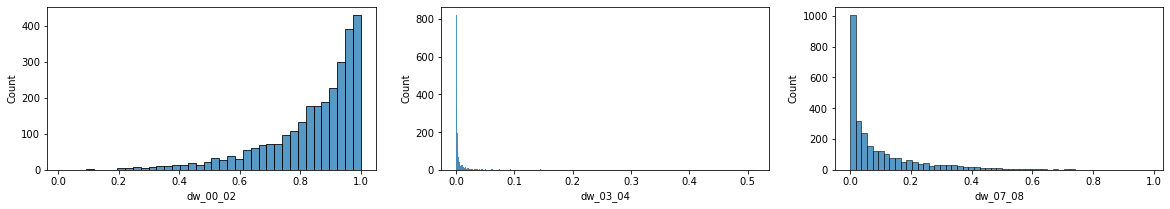

In [16]:
# Creating grouped predictors
data['dw_00_02'] = data[['dw_00','dw_01','dw_02']].sum(axis=1)
data['dw_03_04'] = data[['dw_03','dw_04',]].sum(axis=1)
data['dw_07_08'] = data[['dw_07','dw_08']].sum(axis=1)
# plot univariate disttributions
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
sns.histplot(data.dw_00_02, ax=ax[0])
sns.histplot(data.dw_03_04, ax=ax[1])
sns.histplot(data.dw_07_08, ax=ax[2])

<AxesSubplot:>

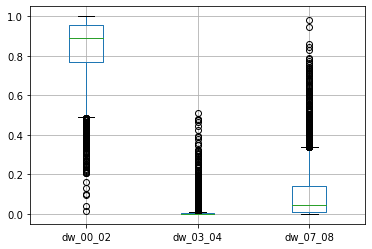

In [17]:
# Many outliers: engineered predictors dw_00_02, dw_03_04, dw_07_08, if used, should be log-transformed
data[['dw_00_02','dw_03_04','dw_07_08']].boxplot()

0.4318698216184643
-0.39453926794042143
-0.21699667037935474


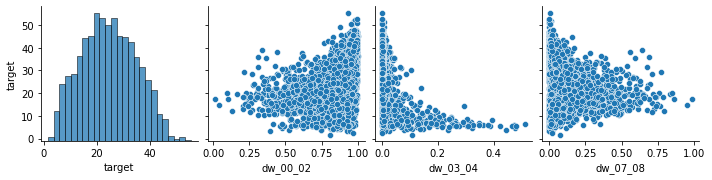

In [18]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','dw_00_02','dw_03_04','dw_07_08'])
print(data.target.corr(data['dw_00_02']))
print(data.target.corr(data['dw_03_04']))
print(data.target.corr(data['dw_07_08']))

### Takeaways: 
#### 1) test a model where a) dwelling = dw_00_02 + dw_03_04 + dw_05 + dw_06 + dw_07_08 + dw_09 + dw_10 + dw_11 and b) dwelling = dw_00
#### 2) dw_00-11, if used, should be log-transformed
#### 3) engineered predictors dw_00_02, dw_03_04, dw_07_08, if used, should be log-transformed
#### 4) Polynomial coefficients potentially better fit for dw_01, dw_03, dw_04, dw_07, dw_08, dw_03_04, dw_07_08
#### 5) exclude dw_12, dw_13 from model as they contain all 0s

## Schooling (psa)

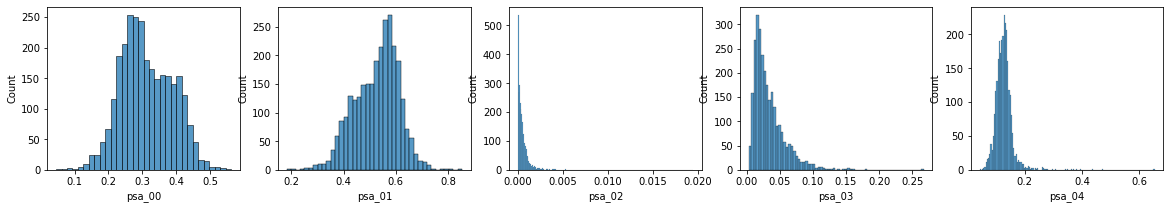

In [19]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(school), figsize=(20, 3))
for i, pred in enumerate(school):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

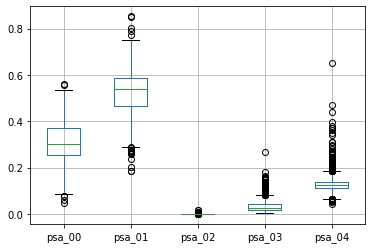

In [20]:
# Many outliers: psa_03 and psa_04, if used, should be log-transformed
data[school].boxplot()

[0.782118542488398, -0.7183003847487742, -0.09827081465015454, -0.3032052056549962, 0.2517755631498657]


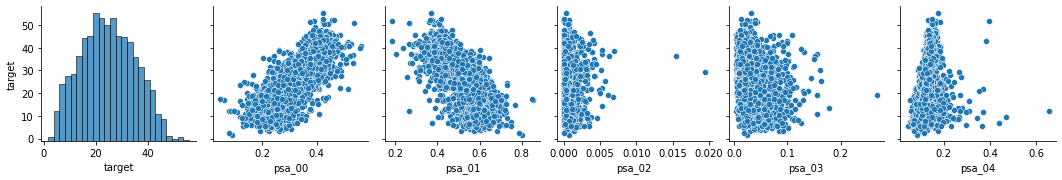

In [21]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+school)
print([data.target.corr(data[pred]) for pred in school])

In [22]:
# The intra-correlation of the predictors within each category of predictors is expectedly very high
data[school].corr()

,psa_00,psa_01,psa_02,psa_03,psa_04
psa_00,1.000000,-0.904983,-0.034919,-0.207657,0.154283
psa_01,-0.904983,1.000000,-0.031971,-0.014051,-0.465548
psa_02,-0.034919,-0.031971,1.000000,0.242323,-0.034631
psa_03,-0.207657,-0.014051,0.242323,1.000000,-0.201596
psa_04,0.154283,-0.465548,-0.034631,-0.201596,1.000000


### Observations: 
#### 1) psa_00 and psa_01 looks like they should be combined. As such, we can consider dropping psa_02, psa_03, psa_04 to do this given their neglible ranges as well as what they represent intuitively. 
#### 2) psa_03 and psa_04, if used, should be log-transformed

,target,psa_00
target,1.000000,0.782119
psa_00,0.782119,1.000000


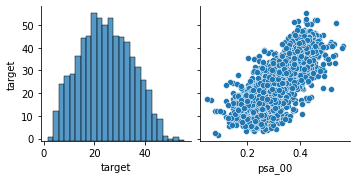

In [23]:
# psa_00, now representing all the information of the schooling category, seem to be a very strong predictor
school = ['psa_00']
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+school)
data[['target']+school].corr()

### Takeaways: 
#### 1) test a model where school = psa_00
#### 2) psa_03 and psa_04, if used, should be log-transformed

## Satellite TV ownership (stv)

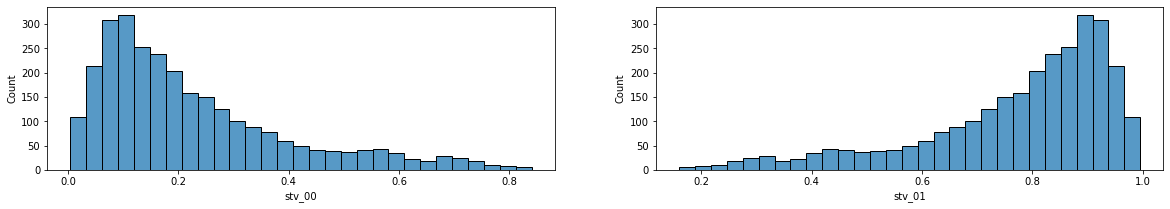

In [24]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(tv), figsize=(20, 3))
for i, pred in enumerate(tv):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

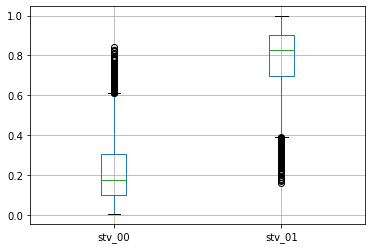

In [25]:
# Many outliers: stv_00 and stv_01, if used, should be log-transformed
data[tv].boxplot()

[-0.6661479130028796, 0.6661479130028793]


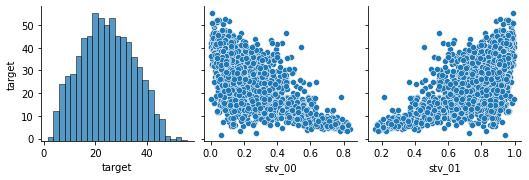

In [26]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+tv)
print([data.target.corr(data[pred]) for pred in tv])

In [27]:
# Should drop stv_01 as it essentially provides the same information as stv_00
data[tv].corr()

,stv_00,stv_01
stv_00,1.0,-1.0
stv_01,-1.0,1.0


### Observations: 
#### 1) Two predictors are essentially each other's inverses -> Should be condensed into one.
#### 2) stv_00 and stv_01, if used, should be log-transformed

,target,stv_00
target,1.000000,-0.666148
stv_00,-0.666148,1.000000


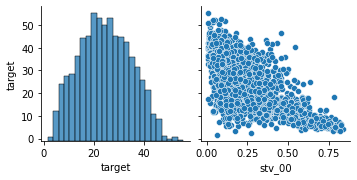

In [28]:
# stv_00, now representing all the information of the tv ownership category, seem to be a pretty strong predictor
tv.remove('stv_01')
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+tv)
data[['target']+tv].corr()

### Takeaways: 
#### 1) Exclude stv_01 and only keep stv_00 as they provide the same information
#### 2) stv_00, if used, should be log-transformed

## Car ownership (car)

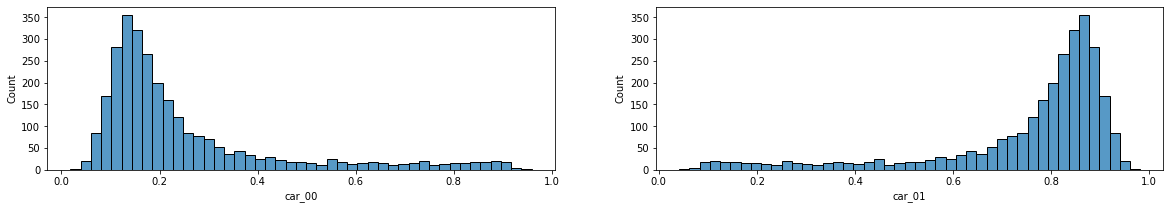

In [29]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(car), figsize=(20, 3))
for i, pred in enumerate(car):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

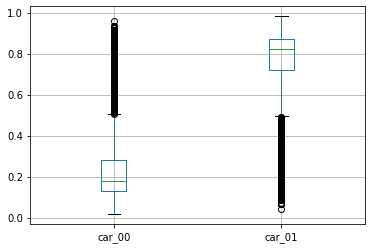

In [30]:
# Many outliers: car_00 and car_01, if used, should be log-transformed
data[car].boxplot()

[-0.7048395063509868, 0.7048395063510577]


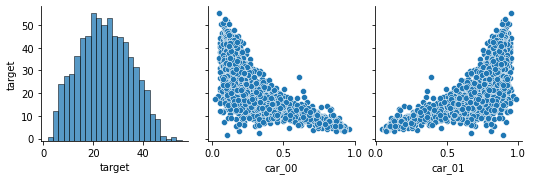

In [31]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+car)
print([data.target.corr(data[pred]) for pred in car])

In [32]:
# Should drop car_01 as it essentially provides the same information as car_00
data[car].corr()

,car_00,car_01
car_00,1.0,-1.0
car_01,-1.0,1.0


### Observations: 
#### 1) Two predictors are essentially each other's inverses -> Should be condensed into one.
#### 2) car_00 and car_01, if used, should be log-transformed

,target,car_00
target,1.00000,-0.70484
car_00,-0.70484,1.00000


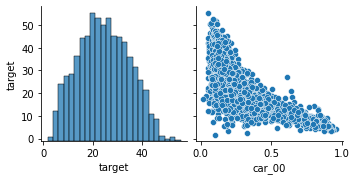

In [33]:
# car_00, now representing all the information of the car ownership category, seem to be a pretty strong predictor
# A polynomial coefficient might suit car_00 better
car.remove('car_01')
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+car)
data[['target']+car].corr()

### Takeaways: 
#### 1) Exclude car_01 and only keep car_00 as they provide the same information
#### 2) car_00, if used, should be log-transformed
#### 3) A polynomial coefficient might suit car_00 better

## Landline ownership (lln)

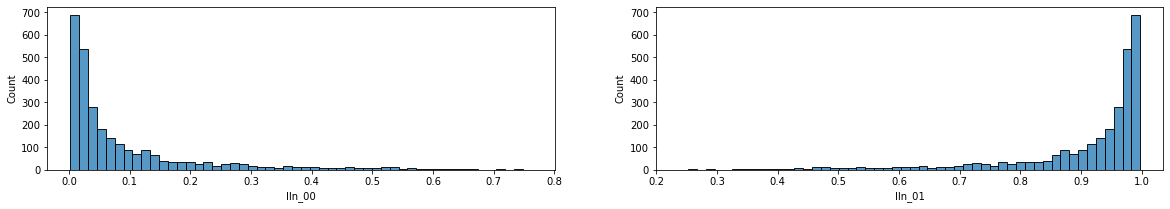

In [34]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(landline), figsize=(20, 3))
for i, pred in enumerate(landline):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

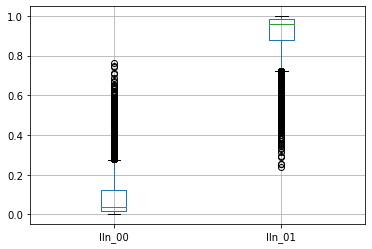

In [35]:
# Many outliers: lln_00 and lln_01, if used, should be log-transformed
data[landline].boxplot()

[-0.6391689602224989, 0.6391689602224988]


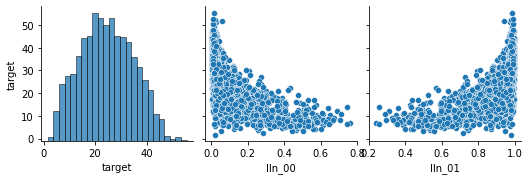

In [36]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+landline)
print([data.target.corr(data[pred]) for pred in landline])

In [37]:
# Should drop lln_01 as it essentially provides the same information as lln_00
data[landline].corr()

,lln_00,lln_01
lln_00,1.0,-1.0
lln_01,-1.0,1.0


### Observations: 
#### 1) Two predictors are essentially each other's inverses -> Should be condensed into one.
#### 2) lln_00 and lln_01, if used, should be log-transformed

,target,lln_00
target,1.000000,-0.639169
lln_00,-0.639169,1.000000


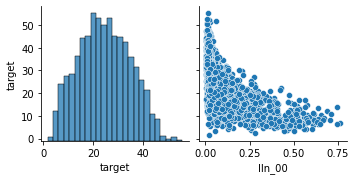

In [38]:
# lln_00, now representing all the information of the landline ownership category, seem to be a pretty strong predictor
# A polynomial coefficient might suit car_00 better
landline.remove('lln_01')
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+landline)
data[['target']+landline].corr()

### Takeaways: 
#### 1) Exclude lln_01 and only keep lln_00 as they provide the same information
#### 2) lln_00, if used, should be log-transformed
#### 3) A polynomial coefficient might suit lin_00 better

## Language (lan)

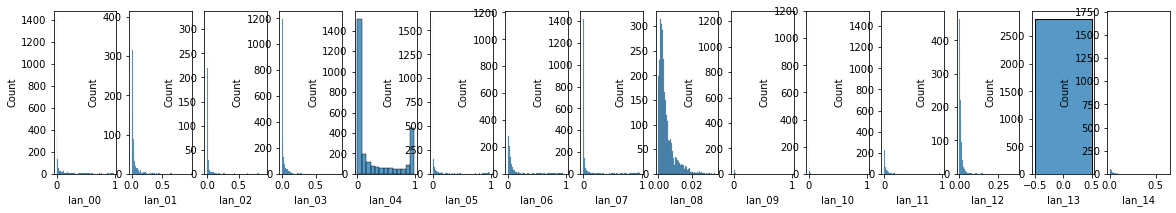

In [39]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(language), figsize=(20, 3))
for i, pred in enumerate(language):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

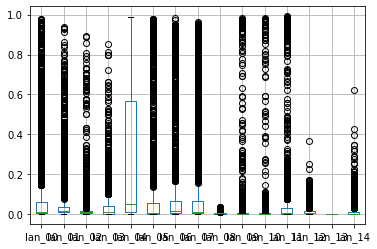

In [40]:
# Many outliers: lan_00-03, lan_05-12, lan_14 if used, should be log-transformed
data[language].boxplot()

[-0.5088783166524111, -0.43956375255409114, -0.020461135260939876, -0.14323922393118602, 0.2318702072891976, 0.27516398072806225, -0.03901845005754095, -0.047435620407400556, -0.004782369021409387, 0.06612234323675642, 0.10649273413792218, 0.21053071407929994, -0.32622073736136803, nan, -0.30019167991645646]


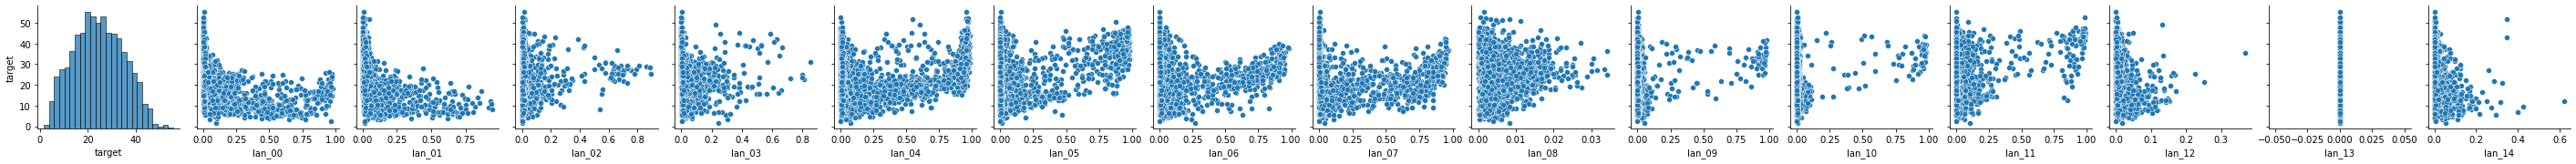

In [41]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+language)
print([data.target.corr(data[pred]) for pred in language])

In [42]:
# lan_13 excluded due to containing all 0s
data[language].drop(['lan_13'], axis=1).corr()

,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14
lan_00,1.000000,0.132338,-0.099413,-0.004837,-0.289364,-0.168557,-0.069939,-0.074917,-0.102531,-0.069729,-0.066448,-0.123374,0.080490,0.236742
lan_01,0.132338,1.000000,-0.065093,-0.002886,-0.094314,-0.145016,-0.112943,-0.110040,-0.091474,-0.061606,-0.057082,-0.102138,0.291949,0.160062
lan_02,-0.099413,-0.065093,1.000000,-0.070941,-0.048699,0.062646,-0.088662,-0.074595,-0.094377,-0.000461,-0.042788,-0.040075,0.013577,-0.064643
lan_03,-0.004837,-0.002886,-0.070941,1.000000,-0.122979,-0.160871,0.173176,-0.003710,0.193637,-0.069495,-0.066391,-0.080267,0.040845,0.029752
lan_04,-0.289364,-0.094314,-0.048699,-0.122979,1.000000,-0.291278,-0.246289,-0.327883,0.015954,-0.079020,-0.131590,-0.208308,-0.199601,-0.124901
lan_05,-0.168557,-0.145016,0.062646,-0.160871,-0.291278,1.000000,-0.165416,-0.153579,-0.252824,-0.054781,-0.047140,0.027318,0.007325,-0.075839
lan_06,-0.069939,-0.112943,-0.088662,0.173176,-0.246289,-0.165416,1.000000,-0.126105,0.683926,-0.077070,-0.072580,-0.095464,-0.084248,-0.015615
lan_07,-0.074917,-0.110040,-0.074595,-0.003710,-0.327883,-0.153579,-0.126105,1.000000,-0.028861,-0.089751,-0.076216,-0.088231,-0.016035,-0.066929
lan_08,-0.102531,-0.091474,-0.094377,0.193637,0.015954,-0.252824,0.683926,-0.028861,1.000000,-0.123483,-0.127370,-0.177463,-0.124031,-0.072395
lan_09,-0.069729,-0.061606,-0.000461,-0.069495,-0.079020,-0.054781,-0.077070,-0.089751,-0.123483,1.000000,-0.030735,0.001183,-0.029317,-0.039789


### Observations: 
#### 1) Can consider only using lan_08, the predictor whose distribution has the most substantial range/variance
#### 2) Can engineer an intuitive binary variable based on african vs. non african language
#### 3) lan_00-03, lan_05-12, lan_14 if used, should be log-transformed
#### 4) Polynomial coefficients potentially better fit for lan_00, lan_01, lan_04
#### 5) Exclude lan_13 from model as they contain all 0s

<AxesSubplot:xlabel='lan_isafrican', ylabel='Count'>

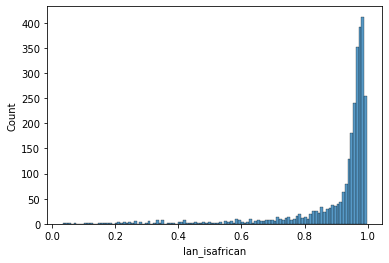

In [43]:
# Creating binary predictor based on whether language is from the african region
data['lan_isafrican'] = data[['lan_00','lan_02','lan_03','lan_04','lan_05','lan_06','lan_07','lan_09','lan_10','lan_11']].sum(axis=1)
# plot univariate disttributions
sns.histplot(data.lan_isafrican)


<AxesSubplot:>

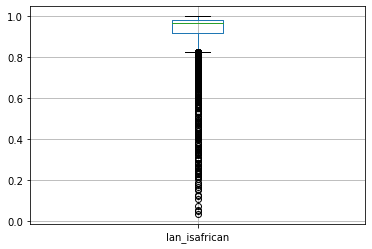

In [44]:
# Many outliers: engineered predictor is_lan_african, if used, should be log-transformed
data[['lan_isafrican']].boxplot()

0.5084225088607385


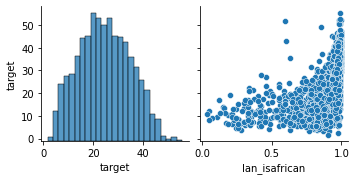

In [45]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','lan_isafrican'])
print(data.target.corr(data['lan_isafrican']))

### Takeaways: 
#### 1) test a model where a) language = lan_08 and b) language = is_lan_african
#### 2) lan_00-03, lan_05-12, lan_14 if used, should be log-transformed
#### 3) engineered predictor lan_isafrican, if used, should be log-transformed
#### 4) Polynomial coefficients potentially better fit for lan_00, lan_01, lan_04, lan_isafrican
#### 5) exclude lan_13 from model as they contain all 0s

## Racial demographic (pg)

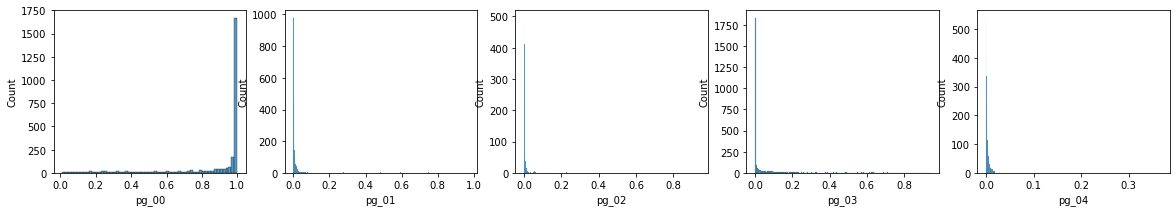

In [46]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(race), figsize=(20, 3))
for i, pred in enumerate(race):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

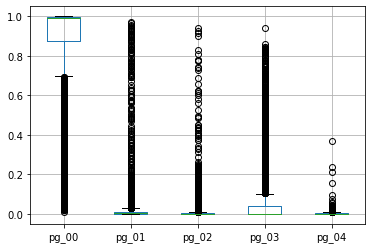

In [47]:
# Many outliers: pg_00-04, if used, should be log-transformed
data[race].boxplot()

[0.6142878832205781, -0.23315709836652954, -0.2243654299072558, -0.5847786789871112, -0.21419628212745803]


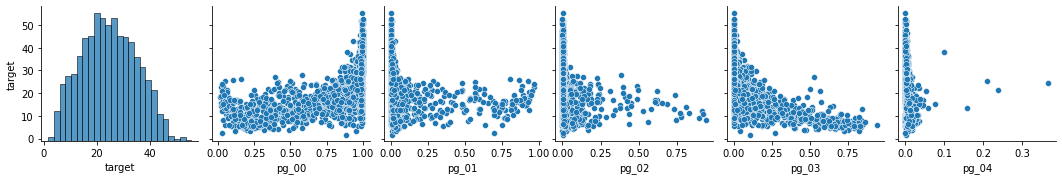

In [48]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+race)
print([data.target.corr(data[pred]) for pred in race])

In [49]:
data[race].corr()

,pg_00,pg_01,pg_02,pg_03,pg_04
pg_00,1.000000,-0.618044,-0.388931,-0.743012,-0.310033
pg_01,-0.618044,1.000000,0.017694,0.041560,0.200242
pg_02,-0.388931,0.017694,1.000000,0.086627,0.102486
pg_03,-0.743012,0.041560,0.086627,1.000000,0.173693
pg_04,-0.310033,0.200242,0.102486,0.173693,1.000000


### Observations: 
#### 1) Black Africans seem to be the predominant racial group in most ward. However, pg_00 alone is a strong, but not exceptional predictor of label, especially when pg_00 is high (which applies to most samples) where the plot fans out, indicating high variance. 
#### 2) We should probably keep the information present in other variables for now and let regularization decide whether to include/exclude them. 
#### 3) We can still potentially condense their information by creating a categorical predictor indicating the dominant race in a given ward. 
#### 4) Additionally, since pg_00 and pg_03 have high correlation with the label and start to change at fairy specific ranges (>0.9 for pg_00 and < 0.25 for pg_03), we can use these boundaries to create categorical predictors from them too.
#### 5) pg_00-04, if used, should be log-transformed

<AxesSubplot:xlabel='pg_00_cat2', ylabel='Count'>

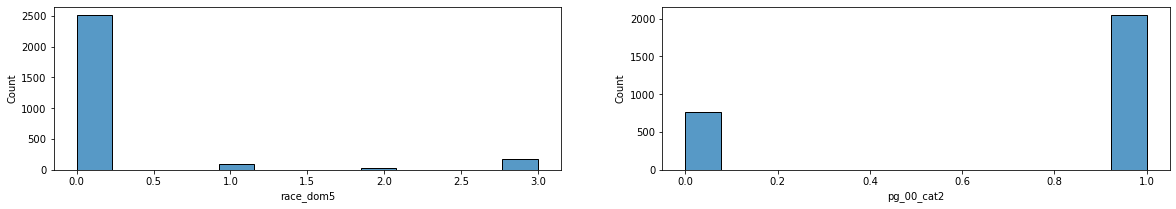

In [50]:
# Create dominant race predictor
data['race_dom5'] = data[race].idxmax(axis=1).astype('category').cat.codes
# Create categorical version of pg_00
data['pg_00_cat2'] = (data.pg_00>0.9).astype(int)
# plot univariate distributions
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
sns.histplot(data.race_dom5, ax=ax[0]) # note that this takes a value of 0-3 as no ward has "Other" as dominant race
sns.histplot(data.pg_00_cat2, ax=ax[1])

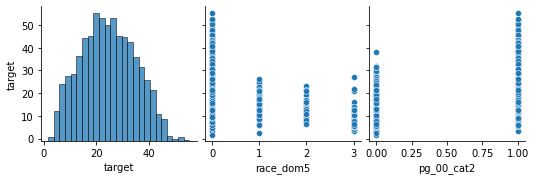

In [51]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','race_dom5','pg_00_cat2'])

### Takeaways: 
#### 1) test a model where a) race = race_dom5, and b) race = pg_00_cat2 + pg_01 + pg_02 + pg_03 + pg_04
#### 2) pg_00-04, if used, should be log-transformed

## Piped water access (pw)

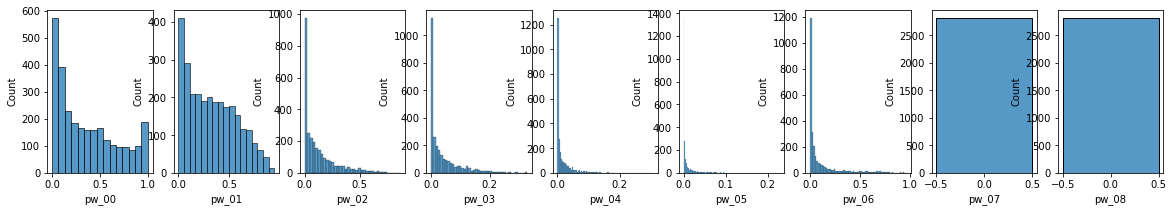

In [52]:
# Plot univariate distributions
fig, ax = plt.subplots(1, len(water), figsize=(20, 3))
for i, pred in enumerate(water):
    sns.histplot(data[pred], ax=ax[i])

<AxesSubplot:>

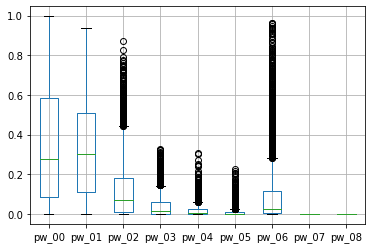

In [53]:
# Many outliers: pg_02-06, if used, should be log-transformed
data[water].boxplot()

[-0.7564807366283159, 0.11262188876715316, 0.45009016501726135, 0.4408131215358456, 0.3893792818624949, 0.34962569972003715, 0.47067421425320244, nan, nan]


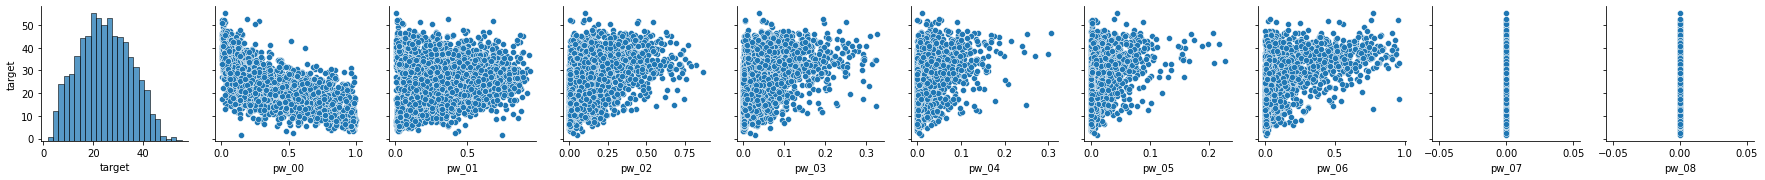

In [54]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target']+water)
print([data.target.corr(data[pred]) for pred in water])

In [55]:
# pw_07, pw_08 excluded due to containing all 0s
data[water].drop(['pw_07','pw_08'], axis=1).corr()

,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06
pw_00,1.000000,-0.343737,-0.542794,-0.503566,-0.411488,-0.335968,-0.476246
pw_01,-0.343737,1.000000,-0.284257,-0.307505,-0.285580,-0.226368,-0.298441
pw_02,-0.542794,-0.284257,1.000000,0.727660,0.487818,0.313490,0.063323
pw_03,-0.503566,-0.307505,0.727660,1.000000,0.612757,0.396452,0.140066
pw_04,-0.411488,-0.285580,0.487818,0.612757,1.000000,0.490998,0.201019
pw_05,-0.335968,-0.226368,0.313490,0.396452,0.490998,1.000000,0.240009
pw_06,-0.476246,-0.298441,0.063323,0.140066,0.201019,0.240009,1.000000


### Observations: 
#### 1) pw_02-06 seems to have fairly similar disitributions, both univariately and wrt the label. They have simliar correlation to the label and seem to provide the same information. 
#### 2) As such, we can consider combining these columns using linear combination
#### 3) Alternatively, we can create a categorical predictor where 1 = majority pw_00 , 2 = majority pw_01, 3 = majority the rest.
#### 4) pw_02-06, if used, should be log-transformed
#### 5) Exclude pw_07, pw_08 from model as they contain all 0s

<AxesSubplot:xlabel='pw_dom3', ylabel='Count'>

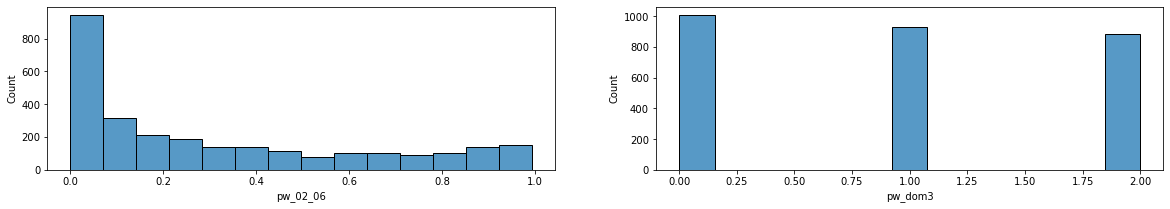

In [56]:
# Create combined predictor of pg_02-06
data['pw_02_06'] = data[['pw_02','pw_03','pw_04','pw_05','pw_06']].sum(axis=1)
# Create categorical column for 3 levels of water access
data['pw_dom3'] = data[['pw_00','pw_01','pw_02_06']].idxmax(axis=1).astype('category').cat.codes
# plot univariate disttributions
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
sns.histplot(data.pw_02_06, ax=ax[0])
sns.histplot(data.pw_dom3, ax=ax[1])

<AxesSubplot:>

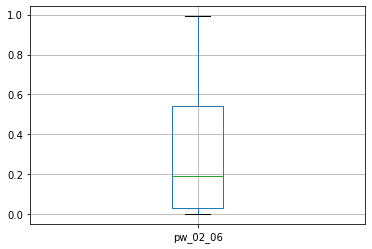

In [57]:
# No outlilers for engineered numeric variable
data[['pw_02_06']].boxplot()

0.646799523498213


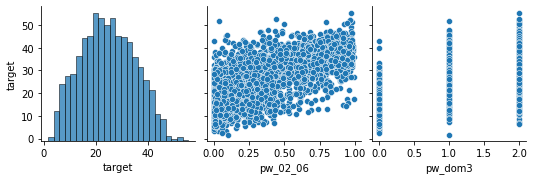

In [58]:
# plot against label
sns.pairplot(data=data,y_vars=['target'],x_vars=['target','pw_02_06','pw_dom3'])
print(data.target.corr(data['pw_02_06']))

### Takeaways: 
#### 1) test a model where a) water = pw_00 + pw_01 + pw_02_06, and b) water = pw_dom3
#### 2) pw_02-06, if used, should be log-transformed
#### 3) Exclude pw_07, pw_08 from model as they contain all 0s